<img src="./logo_UNSAM.jpg" align="right" width="300" /> 

# Análisis y Procesamiento de Señales

## Trabajo Práctico Nº1 - Sistema Lineales e Invariantes en el Tiempo

#### Sofía Gervasi

## Introducción

Los sistemas Lineales e Invariantes en el Tiempo (LTI) discretos se modelan matemáticamente mediante ecuaciones en diferencias lineales con coeficientes constantes, que establecen una relación entre la señal de salida y las muestras actuales y pasadas tanto de la entrada como de la propia salida. 

La respuesta al impulso h[n] se define como la salida del sistema cuando la entrada es un impulso unitario δ[n]. Esta función permite determinar la respuesta a cualquier entrada mediante la operación de convolución y[n] = x[n] * h[n]. 

En el marco de este trabajo, se calculará la salida y la respuesta al impulso de una serie de ecuaciones en diferencias. 

## Análisis y Desarrollo

I. Analizar un sistema definido por la ecuación y[n] = 3·10⁻²·x[n] + 5·10⁻²·x[n-1] + 3·10⁻²·x[n-2] + 1.5·y[n-1] - 0.5·y[n-2], graficar la señal de salida correspondiente a las señales de entrada generadas en el TS1, considerando condiciones causales. Posteriormente, determinar la respuesta al impulso del sistema y regenerar las señales de salida. 

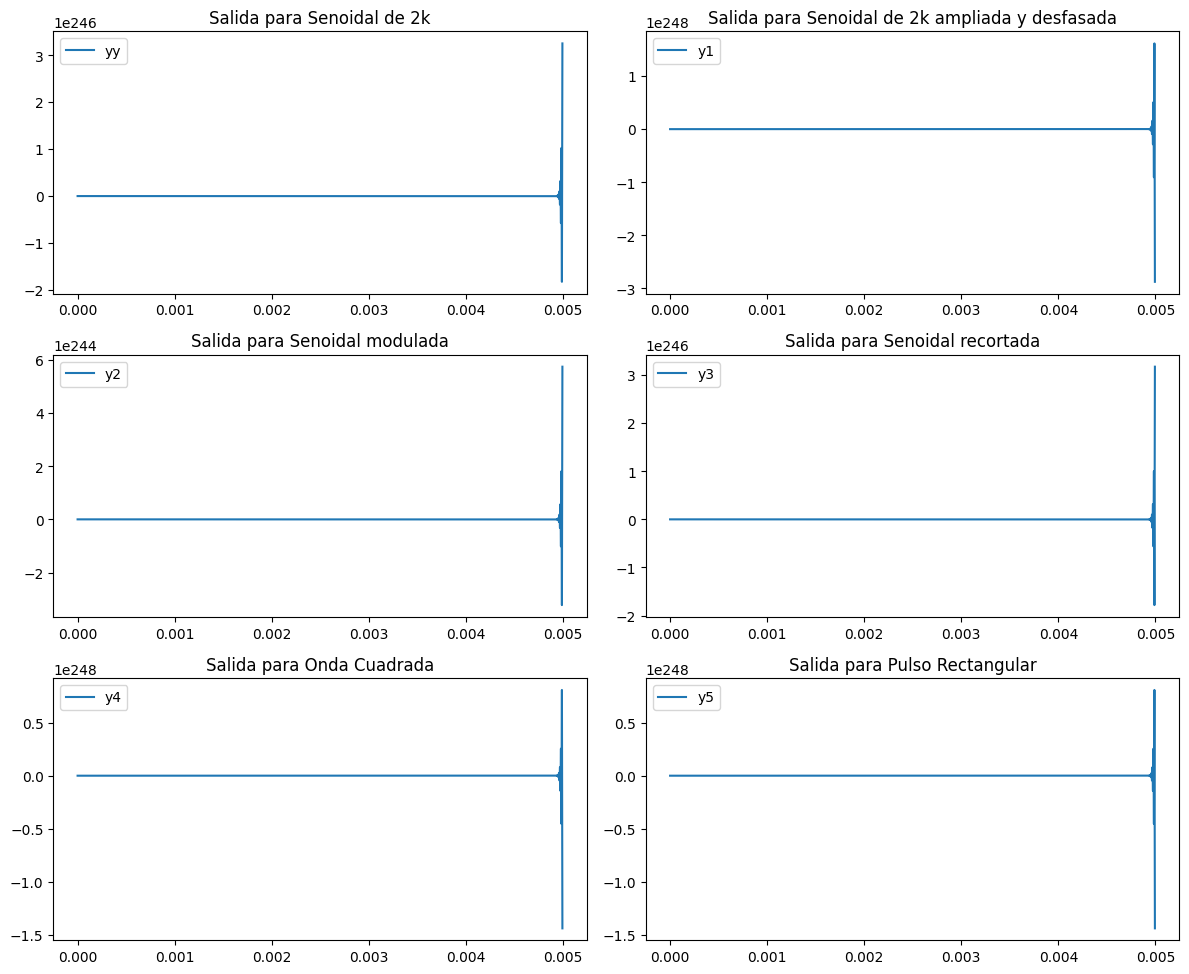

C:\Users\joaqu\AppData\Local\Temp\ipykernel_13132\2773187265.py:155: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


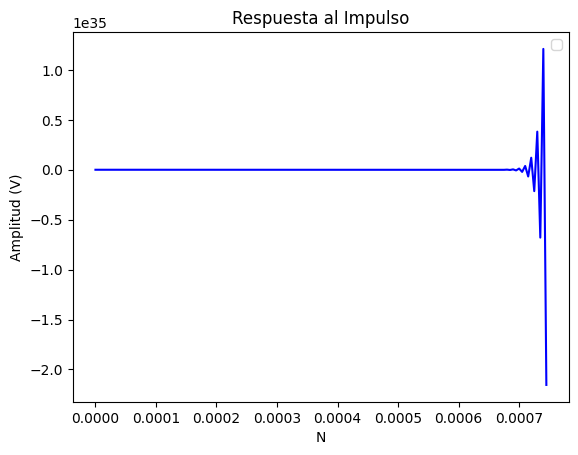

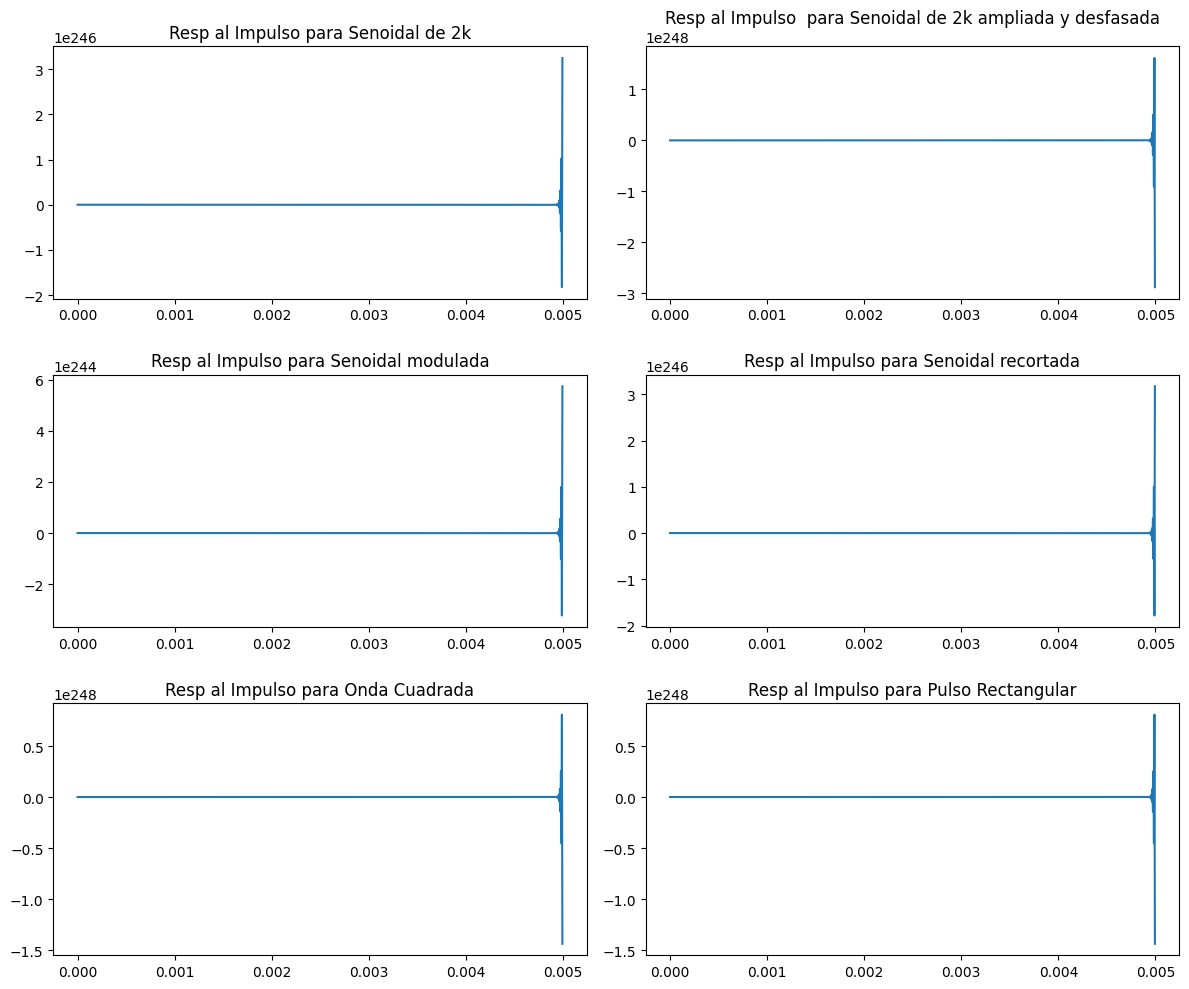

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep  2 19:28:38 2025

@author: Sofía
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parametros de la simulacion
vmax= 1  #Volts 
dc = 0  #Volts
ff = 2000  #Hz
ph = 0 #Radianes
N = 1000 # N
fs = 200000 #Hz
Ts=1/fs #seg
df=fs/N 

#EJERCICIO 1
#%% Para x[n]=xx

tt = np.linspace(0, (N-1)*Ts, N).flatten()  
xx = vmax * np.sin(2 * np.pi * ff * tt + ph) + dc 

# Ecuación en diferencias
b = np.array([3e-2, 5e-2, 3e-2])  
a = np.array([1, -1.5, 0.5])      


def ecuacion_dif(x, b, a):
    N_local = len(x)
    y = np.zeros(N_local)
    
    for n in range(N_local):
        for k in range(len(b)):
            if n-k >= 0:
                y[n] += b[k] * x[n-k]
        
        for k in range(1, len(a)):
            if n-k >= 0:
                y[n] += a[k] * y[n-k]
    
    return y

yy=ecuacion_dif(xx,b,a)

#%% Para x[n]=x1
vmax= 2
ph=np.pi/2

x1 = vmax * np.sin(2 * np.pi * ff * tt + ph) + dc 

y1=ecuacion_dif(x1,b,a)


#%% Para x[n]=x2
vmax= 1
ph=0

x2= (vmax * np.sin(2 * np.pi * ff * tt + ph) + dc)*(2*np.sin(2 * np.pi * 1000 * tt + ph) + dc)

y2=ecuacion_dif(x2,b,a)


#%% Para x[n]=x3
threshold=(vmax**2/2)*0.75

x3= np.clip(xx, -threshold, threshold)

y3=ecuacion_dif(x3,b,a)


#%% Para x[n]=x4
ff = 4000  #Hz

x4=signal.square(2*np.pi*tt*ff)

y4=ecuacion_dif(x4,b,a)


#%% Para x[n]=x5

x5=np.zeros_like(tt)
x5[:200]=1 #10^(-3)*fs es 200

y5=ecuacion_dif(x5,b,a)

#%% Graficos
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Gráfico 1: Salida para Senoidal de 2k
axes[0, 0].plot(tt, yy)
axes[0, 0].set_title('Salida para Senoidal de 2k')
axes[0, 0].legend(['yy']) 

# Gráfico 2: Salida para Senoidal de 2k ampliada y desfasada
axes[0, 1].plot(tt, y1)
axes[0, 1].set_title('Salida para Senoidal de 2k ampliada y desfasada')
axes[0, 1].legend(['y1'])

# Gráfico 3: Salida para Senoidal modulada
axes[1, 0].plot(tt, y2)
axes[1, 0].set_title('Salida para Senoidal modulada')
axes[1, 0].legend(['y2'])

# Gráfico 4: Salida para Senoidal recortada
axes[1, 1].plot(tt, y3)
axes[1, 1].set_title('Salida para Senoidal recortada')
axes[1, 1].legend(['y3'])

# Gráfico 5: Salida para Onda Cuadrada
axes[2, 0].plot(tt, y4)
axes[2, 0].set_title('Salida para Onda Cuadrada')
axes[2, 0].legend(['y4'])

# Gráfico 6: Salida para Pulso Rectangular
axes[2, 1].plot(tt, y5)
axes[2, 1].set_title('Salida para Pulso Rectangular')
axes[2, 1].legend(['y5'])

plt.tight_layout() 
plt.show()

#%% Respuesta al Impulso

# Genero δ[n]
delta=np.zeros(N)
delta[0]=1

h=np.zeros(N)

def resp_impulso(b, a, N):
    for n in range(N):
        h[n] = 0
        
        for k in range(len(b)):
            if n-k >= 0:
                h[n] += b[k] * delta[n-k]
        
        for k in range(1, len(a)):
            if n-k >= 0:
                h[n] += a[k] * h[n-k]
    
    return h

h=resp_impulso(b, a, N)

plt.figure()
plt.title('Respuesta al Impulso')
plt.xlabel('N')
plt.ylabel('Amplitud (V)')
plt.plot(tt[:150], h[:150], 'b-')
plt.legend()

#%% Respuesta al Impulso para Senales TP1

yy_conv=np.convolve(xx,h,mode='full')
yy_conv = yy_conv[:N]

y1_conv=np.convolve(x1,h,mode='full')
y1_conv = y1_conv[:N]

y2_conv=np.convolve(x2,h,mode='full')
y2_conv = y2_conv[:N]

y3_conv=np.convolve(x3,h,mode='full')
y3_conv = y3_conv[:N]

y4_conv=np.convolve(x4,h,mode='full')
y4_conv = y4_conv[:N]

y5_conv=np.convolve(x5,h,mode='full')
y5_conv = y5_conv[:N]

#%% Graficos
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Gráfico 1: Resp al Impulso para Senoidal de 2k
axes[0, 0].plot(tt, yy_conv)
axes[0, 0].set_title('Resp al Impulso para Senoidal de 2k')


# Gráfico 2: Resp al Impulso  para Senoidal de 2k ampliada y desfasada
axes[0, 1].plot(tt, y1_conv)
axes[0, 1].set_title('Resp al Impulso  para Senoidal de 2k ampliada y desfasada')


# Gráfico 3: Resp al Impulso para Senoidal modulada
axes[1, 0].plot(tt, y2_conv)
axes[1, 0].set_title('Resp al Impulso para Senoidal modulada')


# Gráfico 4: Resp al Impulso para Senoidal recortada
axes[1, 1].plot(tt, y3_conv)
axes[1, 1].set_title('Resp al Impulso para Senoidal recortada')


# Gráfico 5: Resp al Impulso para Onda Cuadrada
axes[2, 0].plot(tt, y4_conv)
axes[2, 0].set_title('Resp al Impulso para Onda Cuadrada')


# Gráfico 6: Resp al Impulso para Pulso Rectangular
axes[2, 1].plot(tt, y5_conv)
axes[2, 1].set_title('Resp al Impulso para Pulso Rectangular')


plt.tight_layout() 
plt.show()

II. Hallar la respuesta al impulso y la salida correspondiente a una señal de entrada senoidal en los sistemas definidos mediante la siguiente ecuación en diferencias: y[n]=x[n]+3⋅x[n−10]

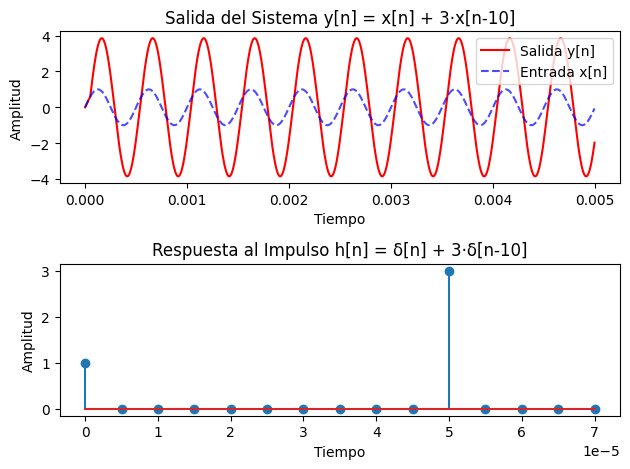

In [6]:
#Calculo de y[n] x[n] + 3·x[n-10]

for i in range(N):
    yy[i] = xx[i]  
    if i >= 10:
        yy[i] += 3 * xx[i-10]  

plt.subplot(2, 1, 1)
plt.plot(tt, yy, 'r-', label='Salida y[n]')
plt.plot(tt, xx, 'b--', alpha=0.7, label='Entrada x[n]')
plt.title('Salida del Sistema y[n] = x[n] + 3·x[n-10]')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()


#Calculo impulso unitario δ[n]
delta = np.zeros(N)  #Impulso
delta[0] = 1 
h = np.zeros(N)  # Respuesta al impulso

for n in range(N):
    h[n] = delta[n]

    if n >= 10:
        h[n] += 3 * delta[n-10]
        

plt.subplot(2, 1, 2)
plt.stem(tt[:15], h[:15],)
plt.title('Respuesta al Impulso h[n] = δ[n] + 3·δ[n-10]')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.tight_layout() 

## Conclusiones

Para todos los casos analizados, la convolución entre la señal y la respuesta al impulso $h[n]$ replico de manera identica la salida $y[n]$ obtenida por la ecuación en diferencias.  Puede decirse entonces que una vez obtenida $h[n]$, se puede predecir la salida $y[n]$ para cualquier señal de entrada del sistema, sin necesidad de volver a resolver la ecuación en diferencias. 
